***
$\mathbf{\text{Linear Regression Algorithm}}$<br>
***

Linear Regression is one of the easiest and most popular algorithms in Machine Learning. It is used for predictive analysis of the data which shows a linear relationship between the dependent and independent variables.

With respect to the given data points, we try to plot a straight line which fits best. This line is known as the regression line

The equation for the regression line can be given as :

\begin{align}
y = mx + c
\end{align}

where, m = slope/bias, which is change in x divided by change in y
c = intercept, that is the point where the regression line cuts the y-axis
x = given input (independent variable)
y = value to be predicted (dependent variable)


Let us further understand the implementation with an example dataset:

### Loading required Libraries

In [1]:
import numpy as np # for mathematical computations
import pandas as pd # to load dataset for testing the algorithm 
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations

### Creating random dataset which shows a positive linear relationship between dependent and independent variable

In [2]:
x = np.array([4, 5, 7, 8, 12, 15, 21, 27, 31, 41])
y = np.array([3, 5, 7, 4, 11, 23, 25, 28, 37, 43])

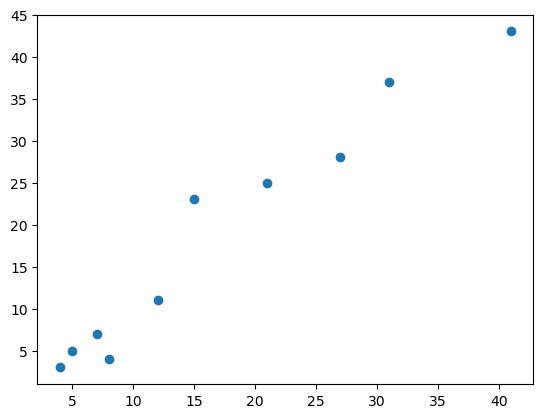

In [3]:
plt.scatter(x, y) # Visualizing the data points. We can clearly see that there is a positive relationship between the variables.

Our goal is to find the best fit line which has the least difference (error/residual) between the predicted value and the actual value.

Cost function (J) will help us to minimize the erro by finding the best value for m and c. Cost function of linear regression is the Mean Squared Error (MSE) 

\begin{align}
J = \frac{1}{N} \sum{}{}(y - ŷ)^{2}
\end{align}

<li> J = cost function </li>
<li> N = Total number of observation/data points </li>
<li> y = actual value </li>
<li> ŷ = predicted value </li>

#### Mathematically, m is given as: 

\begin{align}
m = \frac{\sum{}{}(x - x̄)(y - ȳ)}{\sum{}{}(x - x̄)^2}
\end{align}

In [4]:
# from the given data points, we can calculate the values for x̄ and ȳ

mean_x = x.mean()
mean_y = y.mean()

mean_x, mean_y

(17.1, 18.6)

In [5]:
m = len(x) # Initializing m as length of the data

numerator = 0
denominator = 0

for i in range(m): # Computing the values of the numerator and denominator.
    numerator += (x[i] - mean_x) * (y[i] - mean_y)
    denominator += (x[i] - mean_x) ** 2
    
m = numerator / denominator
m

1.137855269686016

#### Putting the value of m in y = m*x + c by taking mean values of x and y, we will get:

In [6]:
c = mean_y - (m * mean_x)
c

-0.8573251116308747

As we have found the best fit line, we can check how our model is performing. We can check this by calculating the R-Squared value.

R-squared value (coefficient of determination) is a statistical measure of how close the data are to the fitted regression line.

Mathematically, R-Squared is given as:

\begin{align}
R^{2} = 1 - \frac{sum squared regression (SSR)}{total sum of squares (SST)}
\end{align}

\begin{align}
R^{2} = 1 - \frac{\sum{}{}(y - ŷ)^{2}}{\sum{}{}(y - ȳ)^{2}}
\end{align}

The sum squared regression is the sum of the residuals squared, and the total sum of squares is the sum of the distance the data is away from the mean all squared. As it is a percentage it will take values between 0 and 1.

In [7]:
sum_of_squares = 0
sum_of_residuals = 0

y_pred_list = []

for i in range(len(x)):
    y_pred = m*x[i] + c
    y_pred_list.append(y_pred) # Appending the predicted y values in an empty list.
    sum_of_squares += (y[i] - y_pred)**2
    sum_of_residuals += (y[i] - mean_y)**2
    
    r2 = 1 - (sum_of_squares/sum_of_residuals)

In [8]:
r2 

0.9532001930463003

### This value of r2 states that, 95 % of the variation in the y values is accounted for by the x values. Hence this is a good score.

<li>r squared=1 states that, all the variation in the y values is accounted for by the x values</li>
<li>r squared=0 states that, none of the variation in the y values is accounted for by the x values</li>

In [9]:
y_pred_list

[3.6940959671131894,
 4.831951236799205,
 7.107661776171238,
 8.245517045857254,
 12.796938124601319,
 16.210503933659364,
 23.037635551775463,
 29.864767169891557,
 34.41618824863562,
 45.79474094549579]

C:\Users\Gaurav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

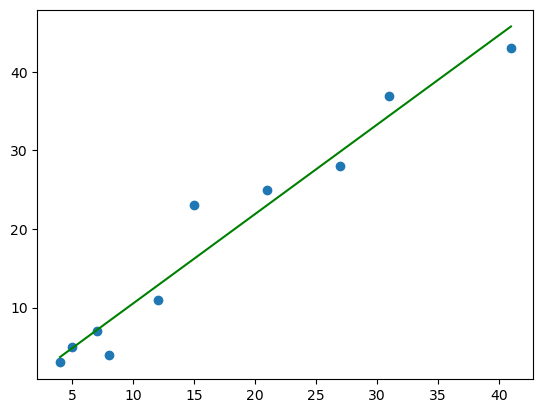

In [10]:
# Let's plot the regression line vs the data points
plt.scatter(x, y)
sns.lineplot(x, y_pred_list, color='green')

### Let us know implement this to a simple dataset from kaggle.

### Dataset link: https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression?select=Salary_Data.csv

In [11]:
df = pd.read_csv("Salary_Data.csv")

In [12]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
df.shape

(30, 2)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

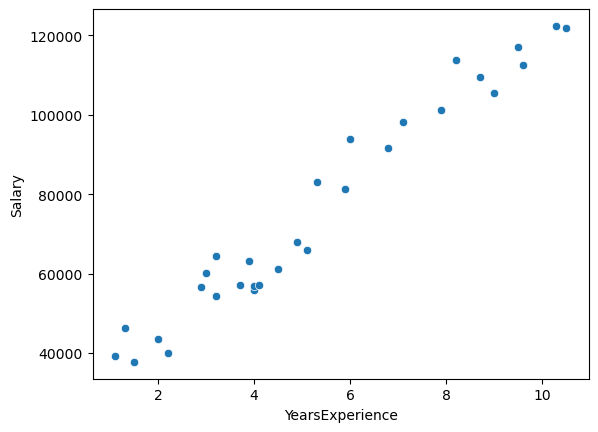

In [14]:
sns.scatterplot(x = 'YearsExperience', y = 'Salary', data = df)

In [15]:
x_mean = df['YearsExperience'].mean()
x_mean

5.3133333333333335

In [16]:
y_mean = df['Salary'].mean()
y_mean

76003.0

In [17]:
# Calculating the m and c value for the equation y = mx +c 

m = len(df['YearsExperience'])
numerator = 0
denominator = 0


for i in range(m):
    numerator += (df['YearsExperience'][i] - x_mean) * (df['Salary'][i] - y_mean)
    denominator += (df['YearsExperience'][i] - x_mean) ** 2
    
m = numerator / denominator
m

9449.962321455077

In [18]:
# Similarly, calculating the value of c = y - mx

c = y_mean - m * x_mean
c

25792.20019866869

### Calculating the R squared value to check how our model is performing

In [19]:
pred_y = []
sum_of_square = 0
sum_of_residual = 0

for i in range(len(df['YearsExperience'])):
    predicted_y = m * df['YearsExperience'][i] + c
    pred_y.append(predicted_y)
    sum_of_square += (df['Salary'][i] - predicted_y) ** 2
    sum_of_residual += (df['Salary'][i] - y_mean) ** 2
    
    r_squared = 1 - (sum_of_square/sum_of_residual)

In [20]:
r_squared

0.9569566641435086

### R Squared value of 95.69% shows that data points are really close to our regression line

In [21]:
pred_y

[36187.15875226927,
 38077.15121656029,
 39967.1436808513,
 44692.12484157884,
 46582.11730586986,
 53197.090930888415,
 54142.087163033924,
 56032.079627324936,
 56032.079627324936,
 60757.06078805248,
 62647.05325234349,
 63592.049484489,
 63592.049484489,
 64537.0457166345,
 68317.03064521654,
 72097.01557379856,
 73987.00803808958,
 75877.0005023806,
 81546.97789525366,
 82491.97412739915,
 90051.94398456322,
 92886.93268099974,
 100446.90253816379,
 103281.8912346003,
 108006.87239532787,
 110841.86109176438,
 115566.84225249192,
 116511.83848463744,
 123126.81210965599,
 125016.80457394701]

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

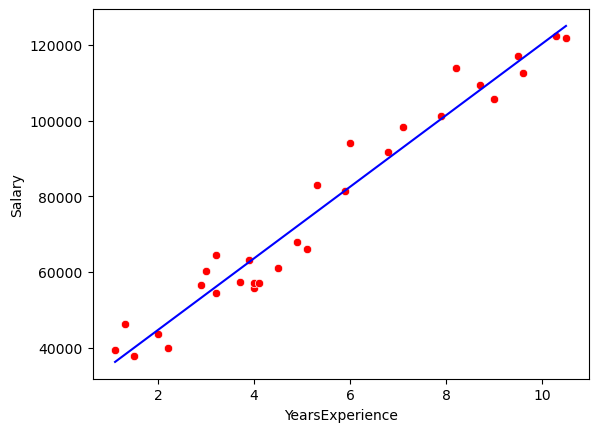

In [22]:
# Now let's visualize the regression line on the data points

sns.scatterplot(x = df['YearsExperience'], y = df['Salary'], color='red')
sns.lineplot(x = df['YearsExperience'], y = pred_y, color='blue')